In [3]:
from __future__ import division, print_function
import kf_book.pf_internal as pf_internal
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from filterpy.stats import plot_gaussian_pdf
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from numpy.random import uniform

def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles

In [10]:
########################
##### Predict Step #####
########################

def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist

In [11]:
#######################
##### Update Step #####
#######################


def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # avoid round-off to zero
    weights /= sum(weights) # normalize

In [12]:
#################################
##### State Estimation Step #####
#################################

def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

In [13]:
#############################
#### Particle Resampling ####
#############################

def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)
    
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))    

def neff(weights):
    return 1. / np.sum(np.square(weights))

In [83]:
####################################
#### Transition Matrix Training ####
####################################

def PredLookup(i, l, gridized_data):
    e = enumerate(zip(gridized_data[1:], gridized_data)):
    if (e[i - 1][1][0] == l)
        return True;
    else:
        return False;
    

agenttrace = '../4jul11p.csv'
f = open(agenttrace)
#print(f.readlines)
oracle = []
gridized_data = []
gridsize = 0.5

xbins = 12
ybins = 20

# Based on Smart Condo Dimension and orientation:
TMatrix = np.zeros((xbins * ybins, xbins * ybins + 1))
TLookupTable = []

for x in range(xbins):
    for y in range(ybins):
        TLookupTable.append(str(x) + "," + str(y))
        
with open(agenttrace, 'r') as user_data:
    reader = csv.reader(user_data, delimiter=',', quotechar=',')
    for row in reader:
        if (reader.line_num > 1):
            oracle.append([float(row[4]), float(row[5])])
            
for d in oracle:
    gridized_data.append([int(np.floor(d[0]/gridsize)), int(np.floor(d[1]/gridsize))])        
    
for x in range(xbins):
    for y in range(ybins):
        # find (x, y)s in gridized_data
        indices = [i for i, l in enumerate(gridized_data) if l == [x, y] and PredLookup(i, l, gridized_data)]
        
        # foreach (x, y): find their next successor; N = total number of successors 
        if not indices:
            print("Agent was not in location [" + str(x) + ", " + str(y) + "] at all")
        else:
            for index in indices:
                N = len(indices)
                
        
        # foreach successor: n = count repeat number
        # foreach successor: p[(x, y) -> successor] = n / N

Agent was not in location [0, 0] at all
Agent was not in location [0, 1] at all
Agent was not in location [0, 2] at all
Agent was not in location [0, 3] at all
Agent was not in location [0, 4] at all
Agent was not in location [0, 5] at all
Agent was not in location [0, 6] at all
Agent was not in location [0, 7] at all
Agent was not in location [0, 8] at all
Agent was not in location [0, 9] at all
Agent was not in location [0, 10] at all
Agent was not in location [0, 11] at all
Agent was not in location [0, 12] at all
Agent was not in location [0, 13] at all
Agent was not in location [0, 14] at all
Agent was not in location [0, 15] at all
Agent was not in location [0, 16] at all
Agent was not in location [0, 17] at all
Agent was not in location [0, 18] at all
Agent was not in location [0, 19] at all
Agent was not in location [1, 0] at all
Agent was not in location [1, 1] at all
Agent was not in location [1, 2] at all
Agent was not in location [1, 3] at all
Agent was not in location [1, 

AttributeError: 'tuple' object has no attribute 'pred'

In [110]:
for i in enumerate(zip(gridized_data, gridized_data[1:])):
    print(i)

(0, ([4, 10], [4, 10]))
(1, ([4, 10], [4, 10]))
(2, ([4, 10], [4, 10]))
(3, ([4, 10], [4, 10]))
(4, ([4, 10], [4, 10]))
(5, ([4, 10], [4, 10]))
(6, ([4, 10], [4, 10]))
(7, ([4, 10], [4, 10]))
(8, ([4, 10], [4, 10]))
(9, ([4, 10], [4, 10]))
(10, ([4, 10], [4, 10]))
(11, ([4, 10], [4, 10]))
(12, ([4, 10], [4, 10]))
(13, ([4, 10], [4, 10]))
(14, ([4, 10], [4, 10]))
(15, ([4, 10], [4, 10]))
(16, ([4, 10], [4, 10]))
(17, ([4, 10], [4, 10]))
(18, ([4, 10], [4, 10]))
(19, ([4, 10], [4, 10]))
(20, ([4, 10], [4, 10]))
(21, ([4, 10], [4, 10]))
(22, ([4, 10], [4, 10]))
(23, ([4, 10], [4, 10]))
(24, ([4, 10], [4, 10]))
(25, ([4, 10], [4, 10]))
(26, ([4, 10], [4, 10]))
(27, ([4, 10], [4, 10]))
(28, ([4, 10], [4, 10]))
(29, ([4, 10], [4, 10]))
(30, ([4, 10], [4, 10]))
(31, ([4, 10], [5, 11]))
(32, ([5, 11], [6, 12]))
(33, ([6, 12], [6, 13]))
(34, ([6, 13], [7, 13]))
(35, ([7, 13], [8, 14]))
(36, ([8, 14], [9, 15]))
(37, ([9, 15], [9, 16]))
(38, ([9, 16], [10, 17]))
(39, ([10, 17], [11, 17]))
(40, ([

(1414, ([12, 14], [12, 13]))
(1415, ([12, 13], [12, 13]))
(1416, ([12, 13], [12, 13]))
(1417, ([12, 13], [12, 13]))
(1418, ([12, 13], [12, 13]))
(1419, ([12, 13], [12, 13]))
(1420, ([12, 13], [12, 13]))
(1421, ([12, 13], [12, 13]))
(1422, ([12, 13], [12, 13]))
(1423, ([12, 13], [12, 13]))
(1424, ([12, 13], [12, 13]))
(1425, ([12, 13], [12, 13]))
(1426, ([12, 13], [12, 9]))
(1427, ([12, 9], [12, 9]))
(1428, ([12, 9], [12, 9]))
(1429, ([12, 9], [12, 9]))
(1430, ([12, 9], [12, 9]))
(1431, ([12, 9], [12, 9]))
(1432, ([12, 9], [12, 9]))
(1433, ([12, 9], [12, 9]))
(1434, ([12, 9], [12, 9]))
(1435, ([12, 9], [12, 9]))
(1436, ([12, 9], [12, 9]))
(1437, ([12, 9], [12, 9]))
(1438, ([12, 9], [12, 9]))
(1439, ([12, 9], [12, 9]))
(1440, ([12, 9], [12, 9]))
(1441, ([12, 9], [12, 9]))
(1442, ([12, 9], [12, 9]))
(1443, ([12, 9], [12, 9]))
(1444, ([12, 9], [12, 9]))
(1445, ([12, 9], [12, 9]))
(1446, ([12, 9], [12, 9]))
(1447, ([12, 9], [12, 9]))
(1448, ([12, 9], [12, 9]))
(1449, ([12, 9], [12, 9]))
(14

(2402, ([4, 15], [4, 15]))
(2403, ([4, 15], [4, 15]))
(2404, ([4, 15], [4, 15]))
(2405, ([4, 15], [4, 15]))
(2406, ([4, 15], [4, 15]))
(2407, ([4, 15], [4, 15]))
(2408, ([4, 15], [4, 15]))
(2409, ([4, 15], [4, 15]))
(2410, ([4, 15], [4, 15]))
(2411, ([4, 15], [4, 15]))
(2412, ([4, 15], [4, 15]))
(2413, ([4, 15], [4, 15]))
(2414, ([4, 15], [4, 15]))
(2415, ([4, 15], [4, 15]))
(2416, ([4, 15], [4, 15]))
(2417, ([4, 15], [4, 16]))
(2418, ([4, 16], [4, 17]))
(2419, ([4, 17], [3, 18]))
(2420, ([3, 18], [3, 18]))
(2421, ([3, 18], [3, 19]))
(2422, ([3, 19], [3, 20]))
(2423, ([3, 20], [3, 20]))
(2424, ([3, 20], [3, 20]))
(2425, ([3, 20], [2, 19]))
(2426, ([2, 19], [2, 19]))
(2427, ([2, 19], [2, 19]))
(2428, ([2, 19], [2, 19]))
(2429, ([2, 19], [1, 19]))
(2430, ([1, 19], [1, 19]))
(2431, ([1, 19], [1, 18]))
(2432, ([1, 18], [1, 18]))
(2433, ([1, 18], [1, 18]))
(2434, ([1, 18], [1, 18]))
(2435, ([1, 18], [1, 18]))
(2436, ([1, 18], [1, 18]))
(2437, ([1, 18], [1, 18]))
(2438, ([1, 18], [1, 18]))
(

(3856, ([4, 10], [4, 10]))
(3857, ([4, 10], [4, 10]))
(3858, ([4, 10], [4, 10]))
(3859, ([4, 10], [4, 10]))
(3860, ([4, 10], [4, 10]))
(3861, ([4, 10], [4, 10]))
(3862, ([4, 10], [4, 10]))
(3863, ([4, 10], [4, 10]))
(3864, ([4, 10], [4, 10]))
(3865, ([4, 10], [4, 10]))
(3866, ([4, 10], [4, 10]))
(3867, ([4, 10], [4, 10]))
(3868, ([4, 10], [4, 10]))
(3869, ([4, 10], [4, 10]))
(3870, ([4, 10], [4, 10]))
(3871, ([4, 10], [4, 10]))
(3872, ([4, 10], [4, 10]))
(3873, ([4, 10], [4, 10]))
(3874, ([4, 10], [4, 10]))
(3875, ([4, 10], [4, 10]))
(3876, ([4, 10], [4, 10]))
(3877, ([4, 10], [4, 10]))
(3878, ([4, 10], [4, 10]))
(3879, ([4, 10], [4, 10]))
(3880, ([4, 10], [4, 10]))
(3881, ([4, 10], [4, 10]))
(3882, ([4, 10], [4, 10]))
(3883, ([4, 10], [4, 10]))
(3884, ([4, 10], [4, 10]))
(3885, ([4, 10], [4, 10]))
(3886, ([4, 10], [4, 10]))
(3887, ([4, 10], [4, 10]))
(3888, ([4, 10], [4, 10]))
(3889, ([4, 10], [4, 10]))
(3890, ([4, 10], [4, 10]))
(3891, ([4, 10], [4, 10]))
(3892, ([4, 10], [4, 10]))
(

(5355, ([4, 12], [4, 12]))
(5356, ([4, 12], [4, 12]))
(5357, ([4, 12], [4, 12]))
(5358, ([4, 12], [4, 12]))
(5359, ([4, 12], [4, 12]))
(5360, ([4, 12], [4, 12]))
(5361, ([4, 12], [4, 12]))
(5362, ([4, 12], [4, 12]))
(5363, ([4, 12], [4, 12]))
(5364, ([4, 12], [4, 11]))
(5365, ([4, 11], [4, 11]))
(5366, ([4, 11], [4, 11]))
(5367, ([4, 11], [4, 11]))
(5368, ([4, 11], [4, 11]))
(5369, ([4, 11], [4, 11]))
(5370, ([4, 11], [4, 11]))
(5371, ([4, 11], [4, 11]))
(5372, ([4, 11], [4, 11]))
(5373, ([4, 11], [4, 11]))
(5374, ([4, 11], [4, 11]))
(5375, ([4, 11], [4, 11]))
(5376, ([4, 11], [4, 11]))
(5377, ([4, 11], [4, 11]))
(5378, ([4, 11], [4, 11]))
(5379, ([4, 11], [4, 10]))
(5380, ([4, 10], [4, 10]))
(5381, ([4, 10], [4, 10]))
(5382, ([4, 10], [4, 10]))
(5383, ([4, 10], [4, 10]))
(5384, ([4, 10], [4, 10]))
(5385, ([4, 10], [4, 10]))
(5386, ([4, 10], [4, 10]))
(5387, ([4, 10], [4, 10]))
(5388, ([4, 10], [4, 10]))
(5389, ([4, 10], [4, 10]))
(5390, ([4, 10], [4, 10]))
(5391, ([4, 10], [4, 10]))
(

(6855, ([1, 6], [1, 6]))
(6856, ([1, 6], [1, 6]))
(6857, ([1, 6], [1, 6]))
(6858, ([1, 6], [1, 6]))
(6859, ([1, 6], [1, 6]))
(6860, ([1, 6], [1, 6]))
(6861, ([1, 6], [1, 6]))
(6862, ([1, 6], [1, 6]))
(6863, ([1, 6], [1, 6]))
(6864, ([1, 6], [1, 6]))
(6865, ([1, 6], [1, 6]))
(6866, ([1, 6], [1, 6]))
(6867, ([1, 6], [1, 6]))
(6868, ([1, 6], [1, 6]))
(6869, ([1, 6], [1, 6]))
(6870, ([1, 6], [1, 6]))
(6871, ([1, 6], [1, 6]))
(6872, ([1, 6], [1, 6]))
(6873, ([1, 6], [1, 6]))
(6874, ([1, 6], [1, 6]))
(6875, ([1, 6], [1, 6]))
(6876, ([1, 6], [1, 6]))
(6877, ([1, 6], [1, 6]))
(6878, ([1, 6], [1, 6]))
(6879, ([1, 6], [1, 6]))
(6880, ([1, 6], [1, 6]))
(6881, ([1, 6], [1, 6]))
(6882, ([1, 6], [1, 6]))
(6883, ([1, 6], [1, 6]))
(6884, ([1, 6], [1, 6]))
(6885, ([1, 6], [1, 6]))
(6886, ([1, 6], [1, 6]))
(6887, ([1, 6], [1, 6]))
(6888, ([1, 6], [1, 6]))
(6889, ([1, 6], [1, 6]))
(6890, ([1, 6], [1, 6]))
(6891, ([1, 6], [1, 6]))
(6892, ([1, 6], [1, 6]))
(6893, ([1, 6], [1, 6]))
(6894, ([1, 6], [1, 6]))


In [104]:
for i in enumerate(gridized_data):
    print(i)

(0, [4, 10])
(1, [4, 10])
(2, [4, 10])
(3, [4, 10])
(4, [4, 10])
(5, [4, 10])
(6, [4, 10])
(7, [4, 10])
(8, [4, 10])
(9, [4, 10])
(10, [4, 10])
(11, [4, 10])
(12, [4, 10])
(13, [4, 10])
(14, [4, 10])
(15, [4, 10])
(16, [4, 10])
(17, [4, 10])
(18, [4, 10])
(19, [4, 10])
(20, [4, 10])
(21, [4, 10])
(22, [4, 10])
(23, [4, 10])
(24, [4, 10])
(25, [4, 10])
(26, [4, 10])
(27, [4, 10])
(28, [4, 10])
(29, [4, 10])
(30, [4, 10])
(31, [4, 10])
(32, [5, 11])
(33, [6, 12])
(34, [6, 13])
(35, [7, 13])
(36, [8, 14])
(37, [9, 15])
(38, [9, 16])
(39, [10, 17])
(40, [11, 17])
(41, [11, 17])
(42, [11, 17])
(43, [11, 17])
(44, [11, 17])
(45, [11, 17])
(46, [11, 17])
(47, [11, 17])
(48, [11, 17])
(49, [11, 17])
(50, [11, 17])
(51, [11, 17])
(52, [8, 14])
(53, [4, 10])
(54, [4, 10])
(55, [4, 10])
(56, [4, 10])
(57, [4, 10])
(58, [4, 10])
(59, [4, 10])
(60, [8, 14])
(61, [11, 17])
(62, [11, 17])
(63, [11, 17])
(64, [11, 17])
(65, [11, 17])
(66, [11, 17])
(67, [11, 17])
(68, [11, 17])
(69, [11, 17])
(70, [11

(1745, [6, 6])
(1746, [6, 6])
(1747, [6, 6])
(1748, [6, 6])
(1749, [6, 6])
(1750, [6, 6])
(1751, [6, 6])
(1752, [6, 6])
(1753, [6, 6])
(1754, [6, 6])
(1755, [6, 6])
(1756, [6, 6])
(1757, [6, 6])
(1758, [6, 6])
(1759, [6, 6])
(1760, [6, 6])
(1761, [6, 6])
(1762, [6, 6])
(1763, [6, 6])
(1764, [6, 6])
(1765, [6, 6])
(1766, [6, 6])
(1767, [6, 6])
(1768, [6, 6])
(1769, [6, 6])
(1770, [6, 6])
(1771, [6, 6])
(1772, [6, 6])
(1773, [6, 6])
(1774, [6, 6])
(1775, [6, 6])
(1776, [6, 6])
(1777, [6, 6])
(1778, [6, 6])
(1779, [6, 6])
(1780, [6, 6])
(1781, [6, 6])
(1782, [6, 6])
(1783, [6, 6])
(1784, [6, 6])
(1785, [6, 6])
(1786, [6, 6])
(1787, [6, 6])
(1788, [6, 6])
(1789, [6, 6])
(1790, [6, 6])
(1791, [6, 6])
(1792, [6, 6])
(1793, [6, 6])
(1794, [6, 6])
(1795, [6, 6])
(1796, [6, 6])
(1797, [6, 6])
(1798, [6, 6])
(1799, [6, 6])
(1800, [6, 6])
(1801, [6, 6])
(1802, [6, 6])
(1803, [6, 6])
(1804, [6, 6])
(1805, [6, 6])
(1806, [6, 6])
(1807, [6, 6])
(1808, [6, 6])
(1809, [6, 6])
(1810, [6, 6])
(1811, [6,

(2788, [5, 14])
(2789, [5, 14])
(2790, [5, 14])
(2791, [5, 14])
(2792, [5, 14])
(2793, [5, 14])
(2794, [5, 14])
(2795, [5, 14])
(2796, [5, 14])
(2797, [5, 14])
(2798, [5, 14])
(2799, [5, 14])
(2800, [5, 14])
(2801, [5, 14])
(2802, [5, 14])
(2803, [5, 14])
(2804, [5, 14])
(2805, [5, 14])
(2806, [5, 14])
(2807, [5, 14])
(2808, [5, 14])
(2809, [5, 14])
(2810, [5, 14])
(2811, [5, 14])
(2812, [5, 14])
(2813, [5, 14])
(2814, [5, 14])
(2815, [5, 14])
(2816, [5, 14])
(2817, [5, 14])
(2818, [5, 14])
(2819, [5, 14])
(2820, [4, 14])
(2821, [3, 15])
(2822, [3, 15])
(2823, [2, 16])
(2824, [1, 16])
(2825, [1, 16])
(2826, [1, 17])
(2827, [1, 17])
(2828, [1, 18])
(2829, [2, 18])
(2830, [2, 18])
(2831, [2, 19])
(2832, [3, 19])
(2833, [3, 20])
(2834, [3, 20])
(2835, [3, 20])
(2836, [3, 20])
(2837, [3, 20])
(2838, [3, 20])
(2839, [3, 20])
(2840, [3, 20])
(2841, [3, 20])
(2842, [3, 20])
(2843, [3, 20])
(2844, [3, 20])
(2845, [3, 20])
(2846, [3, 20])
(2847, [3, 20])
(2848, [3, 20])
(2849, [3, 20])
(2850, [

(4288, [4, 10])
(4289, [4, 10])
(4290, [4, 10])
(4291, [4, 10])
(4292, [4, 10])
(4293, [4, 10])
(4294, [4, 10])
(4295, [4, 10])
(4296, [4, 10])
(4297, [4, 10])
(4298, [4, 10])
(4299, [4, 10])
(4300, [4, 10])
(4301, [4, 10])
(4302, [4, 10])
(4303, [4, 10])
(4304, [4, 10])
(4305, [4, 10])
(4306, [4, 10])
(4307, [4, 10])
(4308, [4, 10])
(4309, [4, 10])
(4310, [4, 10])
(4311, [4, 10])
(4312, [4, 10])
(4313, [4, 10])
(4314, [4, 10])
(4315, [4, 10])
(4316, [4, 10])
(4317, [4, 10])
(4318, [4, 10])
(4319, [4, 10])
(4320, [4, 10])
(4321, [4, 10])
(4322, [4, 10])
(4323, [4, 10])
(4324, [4, 10])
(4325, [4, 10])
(4326, [4, 10])
(4327, [4, 10])
(4328, [4, 10])
(4329, [4, 10])
(4330, [4, 10])
(4331, [4, 10])
(4332, [4, 10])
(4333, [4, 10])
(4334, [4, 10])
(4335, [4, 10])
(4336, [4, 10])
(4337, [4, 10])
(4338, [4, 10])
(4339, [4, 10])
(4340, [4, 10])
(4341, [4, 10])
(4342, [4, 10])
(4343, [4, 10])
(4344, [4, 10])
(4345, [4, 10])
(4346, [4, 10])
(4347, [4, 10])
(4348, [4, 10])
(4349, [4, 10])
(4350, [

(5787, [11, 17])
(5788, [11, 17])
(5789, [1, 16])
(5790, [1, 16])
(5791, [1, 16])
(5792, [1, 16])
(5793, [1, 16])
(5794, [1, 16])
(5795, [1, 16])
(5796, [1, 16])
(5797, [1, 16])
(5798, [1, 16])
(5799, [1, 16])
(5800, [1, 16])
(5801, [1, 16])
(5802, [1, 16])
(5803, [1, 16])
(5804, [1, 16])
(5805, [1, 16])
(5806, [1, 16])
(5807, [1, 16])
(5808, [1, 16])
(5809, [1, 16])
(5810, [1, 16])
(5811, [1, 16])
(5812, [1, 16])
(5813, [1, 16])
(5814, [1, 16])
(5815, [1, 16])
(5816, [1, 16])
(5817, [1, 16])
(5818, [1, 16])
(5819, [1, 16])
(5820, [1, 16])
(5821, [1, 16])
(5822, [1, 16])
(5823, [1, 16])
(5824, [1, 16])
(5825, [1, 16])
(5826, [1, 16])
(5827, [1, 16])
(5828, [1, 16])
(5829, [1, 16])
(5830, [1, 16])
(5831, [1, 16])
(5832, [1, 16])
(5833, [1, 16])
(5834, [1, 16])
(5835, [1, 16])
(5836, [1, 16])
(5837, [1, 16])
(5838, [1, 16])
(5839, [1, 16])
(5840, [1, 16])
(5841, [1, 16])
(5842, [1, 16])
(5843, [1, 16])
(5844, [1, 16])
(5845, [1, 16])
(5846, [1, 16])
(5847, [1, 16])
(5848, [1, 16])
(5849,

(7287, [1, 6])
(7288, [1, 6])
(7289, [1, 6])
(7290, [1, 6])
(7291, [1, 6])
(7292, [1, 6])
(7293, [1, 6])
(7294, [1, 6])
(7295, [1, 6])
(7296, [1, 6])
(7297, [1, 6])
(7298, [1, 6])
(7299, [1, 6])
(7300, [1, 6])
(7301, [1, 6])
(7302, [1, 6])
(7303, [1, 6])
(7304, [1, 6])
(7305, [1, 6])
(7306, [1, 6])
(7307, [1, 6])
(7308, [1, 6])
(7309, [1, 6])
(7310, [1, 6])
(7311, [1, 6])
(7312, [1, 6])
(7313, [1, 6])
(7314, [1, 6])
(7315, [1, 6])
(7316, [1, 6])
(7317, [1, 6])
(7318, [1, 6])
(7319, [1, 6])
(7320, [1, 6])
(7321, [1, 6])
(7322, [1, 6])
(7323, [1, 6])
(7324, [1, 6])
(7325, [1, 6])
(7326, [1, 6])
(7327, [1, 6])
(7328, [1, 6])
(7329, [1, 6])
(7330, [1, 6])
(7331, [1, 6])
(7332, [1, 6])
(7333, [1, 6])
(7334, [1, 6])
(7335, [1, 6])
(7336, [1, 6])
(7337, [1, 6])
(7338, [1, 6])
(7339, [1, 6])
(7340, [1, 6])
(7341, [1, 6])
(7342, [1, 6])
(7343, [1, 6])
(7344, [1, 6])
(7345, [1, 6])
(7346, [1, 6])
(7347, [1, 6])
(7348, [1, 6])
(7349, [1, 6])
(7350, [1, 6])
(7351, [1, 6])
(7352, [1, 6])
(7353, [1,

In [122]:
def PredLookup(i, l, gridized_data):
    e = enumerate(zip(gridized_data[1:], gridized_data))
    print(e[i - 1][1][0])
    if (e[i - 1][1][0] == l):
        return True;
    else:
        return False;
    
li = [2,31,321,41,3423,4,234,24,32,42,3,24,31,123]
zip(li[1:],li)   

for i, l in enumerate(zip(li[1:], li)):
    print(i)
    print(PredLookup(i, l, li))
    


0


TypeError: 'enumerate' object is not subscriptable

In [22]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats

def run_pf1(N, iters=18, sensor_std_err=.1, do_plot=True, plot_particles=False, xlim=(0, 20), ylim=(0, 20), initial_x=None):
    
    #TODO: (Sensor Model)
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    plt.figure()
   
    # create particles and weights
    particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)    
    weights = np.ones(N) / N

    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    robot_pos = np.array([0., 0.])
    for x in range(iters):
        #TODO: (Motion Model)
        robot_pos += (1, 1)

        # distance from subject to each landmark
        #TODO: Need to be changed!
        zs = (norm(landmarks - robot_pos, axis=1) + (randn(NL) * sensor_std_err))

        
        # move diagonally forward to (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # incorporate measurements
        update(particles, weights, z = zs, R = sensor_std_err, landmarks = landmarks)
        
        
        
        
        
        
        
        
        # resample if too few effective particles
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], color='k', marker=',', s=1)
        
        p1 = plt.scatter(robot_pos[0], robot_pos[1], marker='+', color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'PF'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('final position error, variance:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

final position error, variance:
	 [-0.10621456  0.1061402 ] [0.00859646 0.00757081]


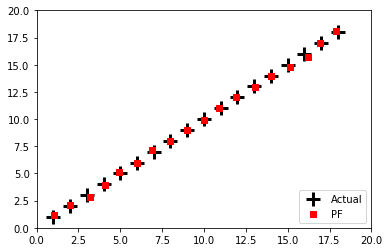

In [23]:
from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=False)